<a href="https://colab.research.google.com/github/ubsingh9/tensorFlow/blob/master/imdb_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
imdb,info= tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete47MMQT/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete47MMQT/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete47MMQT/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [0]:
import numpy as np

In [0]:
train_data, test_data = imdb['train'], imdb['test']

In [0]:
training_sentence=[]
training_label=[]

test_sentence=[]
test_label =[]

In [6]:
len(training_label)
len(test_label)

0

In [0]:
for s,l in train_data:
  training_sentence.append(str(s.numpy()))
  training_label.append(l.numpy())

for s,l in test_data:
  test_sentence.append(str(s.numpy()))
  test_label.append(l.numpy())

In [8]:
training_sentence[0]

'b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."'

In [9]:
training_label[0]

0

In [0]:
training_label_final = np.array(training_label)
testing_label_final = np.array(test_label)

In [0]:
vocab_size=10000
embedding_dim =16
max_length=120
trunc_type='post'
oov_tok='<OOV>'

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [0]:
tokenizer=Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentence)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(training_sentence)
padded=pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

testing_sequences=tokenizer.texts_to_sequences(test_sentence)
test_padded = pad_sequences(testing_sequences, maxlen=max_length,truncating=trunc_type)

In [0]:
model= tf.keras.Sequential([
                            tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                            tf.keras.layers.GlobalAveragePooling1D(),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [23]:
num_epoch=10
history = model.fit(padded, training_label_final, epochs=num_epoch, validation_data=(test_padded, testing_label_final))

Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 0.1432 - accuracy: 0.9518 - val_loss: 0.5341 - val_accuracy: 0.8087
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1338 - accuracy: 0.9562 - val_loss: 0.5598 - val_accuracy: 0.8084
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1243 - accuracy: 0.9594 - val_loss: 0.6027 - val_accuracy: 0.8032
Epoch 4/10
782/782 [==============================] - 7s 8ms/step - loss: 0.1157 - accuracy: 0.9626 - val_loss: 0.6435 - val_accuracy: 0.7981
Epoch 5/10
782/782 [==============================] - 7s 8ms/step - loss: 0.1079 - accuracy: 0.9668 - val_loss: 0.6626 - val_accuracy: 0.8008
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1002 - accuracy: 0.9712 - val_loss: 0.6962 - val_accuracy: 0.7983
Epoch 7/10
782/782 [==============================] - 7s 8ms/step - loss: 0.0929 - accuracy: 0.9740 - val_loss: 0.7458 - val_accuracy: 0.7934
Epoch 

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

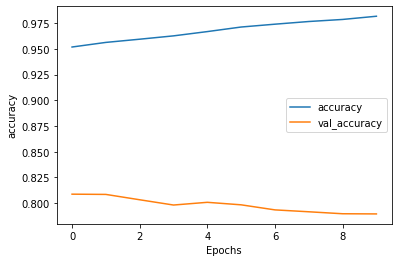

In [26]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [0]:
model_flatten= tf.keras.Sequential([
                            tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(6, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model_flatten.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [29]:
num_epoch=20
history = model_flatten.fit(padded, training_label_final, epochs=num_epoch, validation_data=(test_padded, testing_label_final))

Epoch 1/20
782/782 [==============================] - 6s 8ms/step - loss: 0.5045 - accuracy: 0.7324 - val_loss: 0.3883 - val_accuracy: 0.8231
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 0.2430 - accuracy: 0.9057 - val_loss: 0.4159 - val_accuracy: 0.8188
Epoch 3/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0877 - accuracy: 0.9786 - val_loss: 0.5090 - val_accuracy: 0.8096
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0211 - accuracy: 0.9974 - val_loss: 0.6228 - val_accuracy: 0.8072
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0053 - accuracy: 0.9996 - val_loss: 0.6801 - val_accuracy: 0.8086
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.7359 - val_accuracy: 0.8104
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 8.2893e-04 - accuracy: 1.0000 - val_loss: 0.7919 - val_accuracy: 0.8099
Ep

In [0]:
test_op=model_flatten.predict(test_padded)

In [39]:
test_op[5]

array([0.9999906], dtype=float32)

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

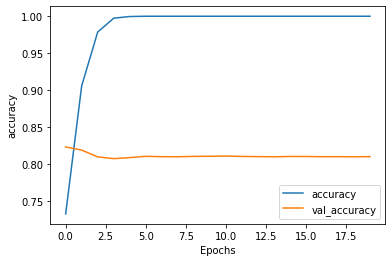

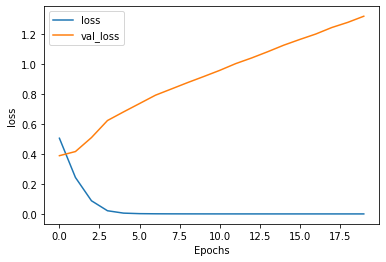

In [31]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')